In [182]:
# Apurva Shah, 705595011, Psych 186B
# Homework 4

# General Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import statistics

### 4.19 - 4.23

In [183]:
class NeuralInhibitionModel:
    def __init__(self, dim=30, num_iter=50, length_constant=2, epsilon=0.1,
                 max_strength=0.1, upper_limit=40, lower_limit=0):
        self.dim = dim
        self.half_dim = dim // 2
        self.num_iter = num_iter
        self.length_constant = length_constant
        self.epsilon = epsilon
        self.max_strength = abs(max_strength)  # Ensure inhibition
        self.upper_limit = upper_limit
        self.lower_limit = lower_limit
        self.inhibitory_weights = np.zeros((dim, dim))
        self.initial_state_vector = np.zeros(dim)
        self.state_vector = np.zeros(dim)

    def initialize_state_vector(self):
        self.initial_state_vector[:20] = 10
        self.initial_state_vector[20:60] = 40
        self.initial_state_vector[60:] = 10

    def make_inhibitory_weights(self):
        # First row
        for i in range(self.half_dim):
            self.inhibitory_weights[0, i] = -(self.max_strength) * np.exp(-(i) / self.length_constant)
        for i in range(self.half_dim, self.dim):
            self.inhibitory_weights[0, i] = -(self.max_strength) * np.exp(-((self.dim) - i) / self.length_constant)

        # Shift elements for remaining rows
        for i in range(1, self.dim):
            self.inhibitory_weights[i, 1:] = self.inhibitory_weights[i-1, :-1]
            self.inhibitory_weights[i, 0] = self.inhibitory_weights[i-1, -1]

    def compute_inhibited_state_vector(self):
        new_state_vector = np.zeros(self.dim)
        self.state_vector = self.initial_state_vector.copy()

        for _ in range(self.num_iter):
            for j in range(self.dim):
                err = self.initial_state_vector[j] + np.dot(self.inhibitory_weights[j, :], self.state_vector) - self.state_vector[j]
                new_state_vector[j] = self.state_vector[j] + self.epsilon * err

            new_state_vector = self.limit_state_vector(new_state_vector)
            self.state_vector = new_state_vector.copy()

    def limit_state_vector(self, n_state_vector):
        n_state_vector[n_state_vector > self.upper_limit] = self.upper_limit
        n_state_vector[n_state_vector < self.lower_limit] = self.lower_limit
        return n_state_vector

    def plot_results(self):
        plt.figure(figsize=(6, 6))
        plt.plot(range(1, self.dim+1), self.initial_state_vector, '+k', label='Initial')
        plt.plot(range(1, self.dim+1), self.state_vector, '*k', label='Comparison')
        plt.xlabel('Neurons')
        plt.ylabel('Firing rate')
        plt.xlim([12, self.dim])
        plt.ylim([0, max(self.upper_limit, max(self.initial_state_vector.max(), self.state_vector.max())) + 10])
        plt.legend()
        plt.show()

    def run_simulation(self, length_constant, max_strength):
        self.length_constant = length_constant
        self.max_strength = max_strength
        self.initialize_state_vector()
        self.make_inhibitory_weights()
        self.compute_inhibited_state_vector()
        self.plot_results()

InhibitionMod = NeuralInhibitionModel()

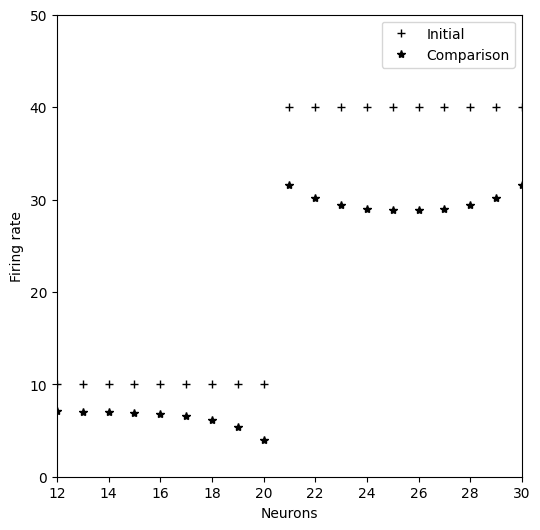

In [184]:
# 4.19

InhibitionMod.run_simulation(2.0, 0.1)

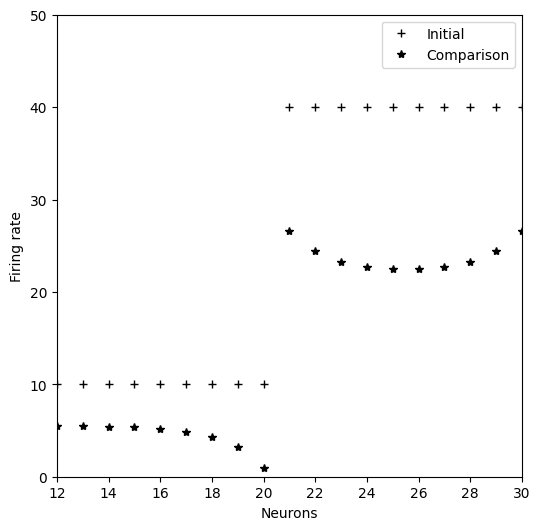

In [185]:
# 4.20

InhibitionMod.run_simulation(2.0, 0.2)

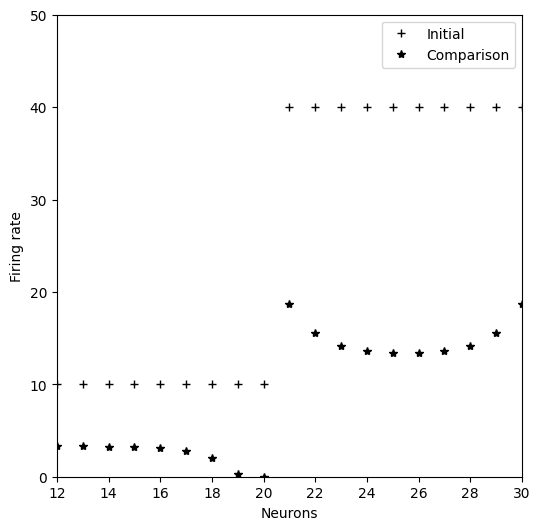

In [186]:
# 4.21

InhibitionMod.run_simulation(2.0, 0.5)

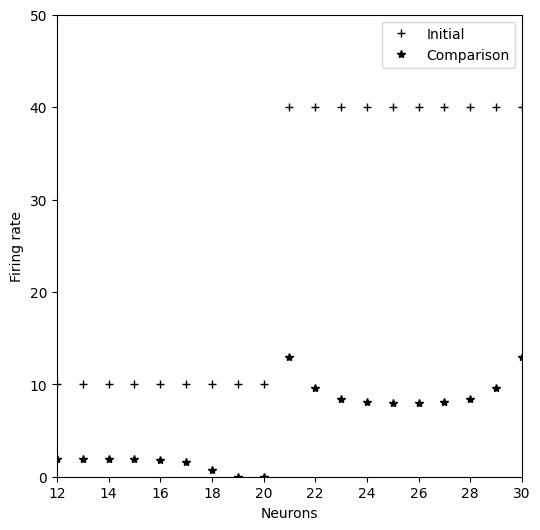

In [187]:
# 4.22

InhibitionMod.run_simulation(2.0, 1.0)

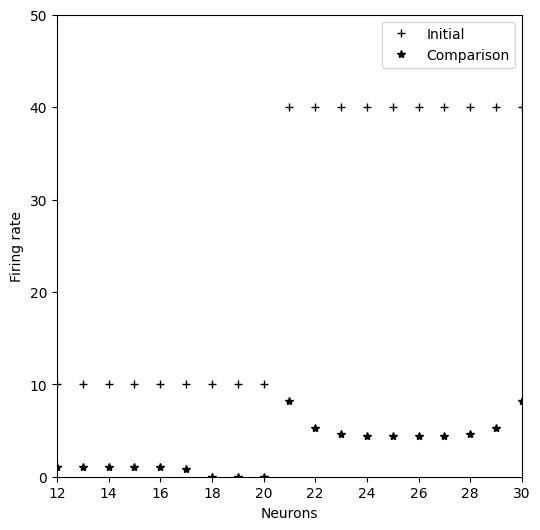

In [188]:
# 4.23

InhibitionMod.run_simulation(2.0, 2.0)

### 4.26 - 4.29

In [189]:
import numpy as np
import matplotlib.pyplot as plt

class WTAInhibitionModel:
    def __init__(self, dim=30, num_iter=50, length_constant=10, epsilon=0.1,
                 max_strength=2.0, upper_limit=60, lower_limit=0, winner_take_all=True):
        self.dim = dim
        self.num_iter = num_iter
        self.length_constant = length_constant
        self.epsilon = epsilon
        self.max_strength = abs(max_strength)  # Ensure inhibition
        self.upper_limit = upper_limit
        self.lower_limit = lower_limit
        self.winner_take_all = winner_take_all
        self.inhibitory_weights = np.zeros((dim, dim))
        self.initial_state_vector = np.zeros(dim)
        self.state_vector = np.zeros(dim)
        self.problem = 26
    
    def run_print(self, problem_num, p_type):
        print("Running Problem: 4.", self.problem)
        for s in problem_num:
            self.initial_state_vector[s[0]] = s[1]
        for p in p_type:
            self.state_vector[p[0]] = p[1]
        
    def initialize_state_vector(self, twin_peaks):
        if self.winner_take_all:
            self.initial_state_vector = np.ones(self.dim) * 10
            self.initial_state_vector[16:20] = np.arange(10, 50, 10)
            self.initial_state_vector[20:24] = np.arange(40, 0, -10)
            if twin_peaks:
                self.initial_state_vector[13:23] = [20, 30, 20, 10, 10, 20, 30, 40, 30, 20]
            self.bias = [[20, 40], [16, 20], [22, 20], [23, 10], [19, 50], [17, 30], [15, 10], [18, 40], [21, 30]]
            self.no_bias = d2 = [[19, 43], [20, 1], [18, 1]]

    def make_inhibitory_weights(self):
        # First row construction
        for i in range(self.dim // 2):
            self.inhibitory_weights[0, i] = -(self.max_strength) * np.exp(-(i) / self.length_constant)
        for i in range(self.dim // 2, self.dim):
            self.inhibitory_weights[0, i] = -(self.max_strength) * np.exp(-((self.dim) - i) / self.length_constant)

        # Shift elements for remaining rows
        for i in range(1, self.dim):
            self.inhibitory_weights[i, 1:] = self.inhibitory_weights[i-1, :-1]
            self.inhibitory_weights[i, 0] = self.inhibitory_weights[i-1, -1]

        if self.winner_take_all:
            np.fill_diagonal(self.inhibitory_weights, 0)
            
    def compute_inhibited_state_vector(self):
        self.state_vector = self.initial_state_vector.copy()
        for _ in range(self.num_iter):
            for j in range(self.dim):
                err = self.initial_state_vector[j] + np.dot(self.inhibitory_weights[j, :], self.state_vector) - self.state_vector[j]
                self.state_vector[j] = self.state_vector[j] + self.epsilon * err
            self.state_vector = self.limit_state_vector(self.state_vector)
        
        if self.problem == 29:
            d1 = [[20, 35]]
            self.run_print([], d1)


            
    def limit_state_vector(self, vector):
        vector[vector > self.upper_limit] = self.upper_limit
        vector[vector < self.lower_limit] = self.lower_limit
        return vector

    def plot_results(self):
        plt.figure(figsize=(6, 6))
        plt.plot(range(1, self.dim+1), self.initial_state_vector, '+k', label='Initial')
        plt.plot(range(1, self.dim+1), self.state_vector, '*k', label='Comparison')
        plt.xlabel('Neurons')
        plt.ylabel('Firing rate')
        plt.xlim([12, 30])
        plt.xticks(range(12, 30))
        plt.ylim([0, 50])
        plt.legend()
        plt.show()
        
    def run_simulation(self, length_constant, max_strength, twin_peaks, light_bias):
        self.length_constant = length_constant
        self.max_strength = max_strength
        self.initialize_state_vector(twin_peaks)
        self.make_inhibitory_weights()
        self.compute_inhibited_state_vector()
        if self.problem == 26 or self.problem == 27:
            self.run_print(self.bias, self.no_bias)
        self.problem += 1
        self.plot_results()


model = WTAInhibitionModel()


Running Problem: 4. 26


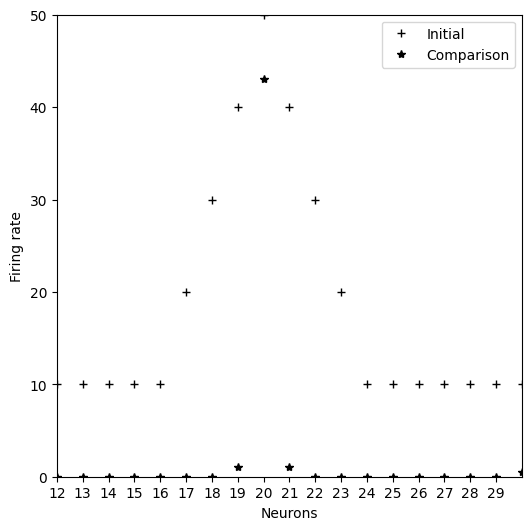

In [190]:
# 4.26

model.run_simulation(10.00, 1.00, twin_peaks=False, light_bias=False)

Running Problem: 4. 27


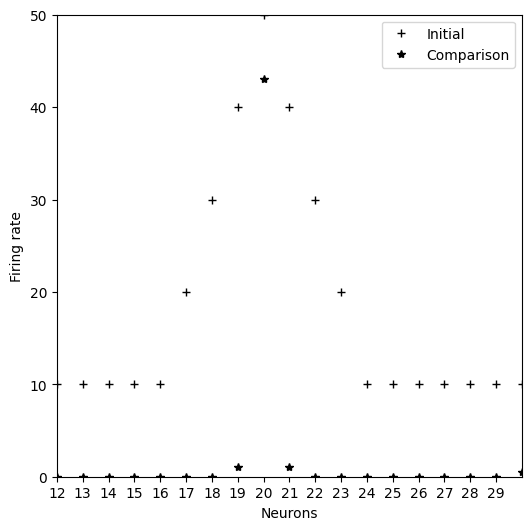

In [191]:
# 4.27

model.run_simulation(10.00, 1.00, twin_peaks=False, light_bias=True)

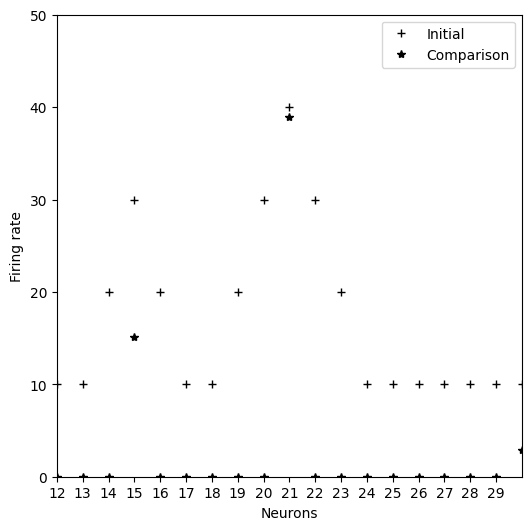

In [192]:
# 4.28

model.run_simulation(10.00, 1.00, twin_peaks=True, light_bias=False)

Running Problem: 4. 29


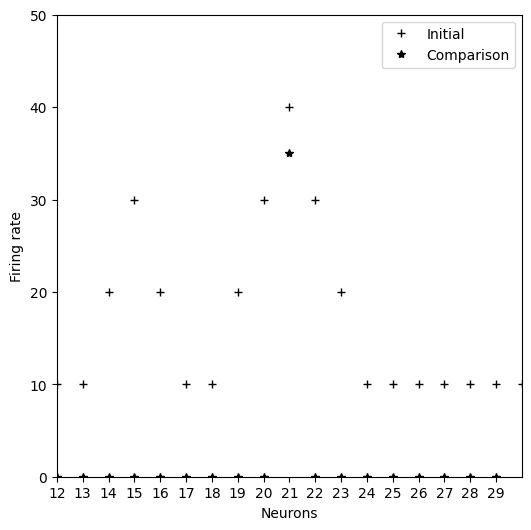

In [193]:
# 4.28

model.run_simulation(10.00, 2.00, twin_peaks=True, light_bias=False)